In [50]:
pip install jsonpath
import requests
import urllib
import time
import json
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from requests.packages.urllib3.connectionpool import InsecureRequestWarning
import json
import jsonpath
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)
 
header = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:67.0) Gecko/20100101 Firefox/67.0',
       'Accept-Encoding': 'gzip, deflate, br',
       'Accept-Language': 'zh-CN,zh;q=0.8,zh-TW;q=0.7,zh-HK;q=0.5,en-US;q=0.3,en;q=0.2',
       'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
#        'Referer': 'https://weibo.com/?sudaref=www.baidu.com&display=0&retcode=6102',
       'Connection': 'keep-alive'
       }
session = requests.session()
url = 'https://api.inews.qq.com/newsqa/v1/automation/foreign/country/ranklist'
response = session.post(url,verify = False, headers = header)

In [52]:
cov = json.loads(response.text)

In [53]:
cov['data']

[{'name': '美国',
  'continent': '北美洲',
  'date': '06.17',
  'isUpdated': True,
  'confirmAdd': 25450,
  'confirmAddCut': 0,
  'confirm': 2208400,
  'suspect': 0,
  'dead': 119132,
  'heal': 903041,
  'nowConfirm': 1186227,
  'confirmCompare': 25450,
  'nowConfirmCompare': 11426,
  'healCompare': 13175,
  'deadCompare': 849},
 {'name': '巴西',
  'continent': '南美洲',
  'date': '06.17',
  'isUpdated': False,
  'confirmAdd': 34918,
  'confirmAddCut': 0,
  'confirm': 923189,
  'suspect': 0,
  'dead': 45241,
  'heal': 490005,
  'nowConfirm': 387943,
  'confirmCompare': 34918,
  'nowConfirmCompare': 21340,
  'healCompare': 12296,
  'deadCompare': 1282},
 {'name': '俄罗斯',
  'continent': '欧洲',
  'date': '06.17',
  'isUpdated': False,
  'confirmAdd': 7824,
  'confirmAddCut': 0,
  'confirm': 552549,
  'suspect': 0,
  'dead': 7468,
  'heal': 303800,
  'nowConfirm': 241281,
  'confirmCompare': 7824,
  'nowConfirmCompare': -2390,
  'healCompare': 10020,
  'deadCompare': 194},
 {'name': '印度',
  'continent

In [35]:
# cov['data'][0]['name']

'美国'

In [54]:
#json的模糊索引
name = jsonpath.jsonpath(cov,"$..name")
continent = jsonpath.jsonpath(cov,"$..continent")
date = jsonpath.jsonpath(cov,"$..date")
isUpdated = jsonpath.jsonpath(cov,"$..isUpdated")
confirmAdd = jsonpath.jsonpath(cov,"$..confirmAdd")
confirmAddCut = jsonpath.jsonpath(cov,"$..confirmAddCut")
confirm = jsonpath.jsonpath(cov,"$..confirm")
suspect = jsonpath.jsonpath(cov,"$..suspect")
dead = jsonpath.jsonpath(cov,"$..dead")
heal = jsonpath.jsonpath(cov,"$..heal")
nowConfirm = jsonpath.jsonpath(cov,"$..nowConfirm")
confirmCompare = jsonpath.jsonpath(cov,"$..confirmCompare")
nowConfirmCompare = jsonpath.jsonpath(cov,"$..nowConfirmCompare")
healCompare = jsonpath.jsonpath(cov,"$..healCompare")
deadCompare = jsonpath.jsonpath(cov,"$..deadCompare")

In [56]:
final_dic={"name":name,
            "continent" : continent,
           "date" : date,
            "isUpdated":isUpdated,
            "confirmAdd":confirmAdd,
           "confirmAddCut":confirmAddCut,
           "confirm":confirm,       
           "suspect":suspect,
           "dead":dead,
           "heal":heal,
           "nowConfirm":nowConfirm,
           "confirmCompare":confirmCompare,
           "nowConfirmCompare":nowConfirmCompare,
           "healCompare":healCompare,
           "deadCompare":deadCompare
           
  }#将列表转换成字典
data=pd.DataFrame(final_dic)#将字典转换成为数据框


In [153]:
data["cure_rate"] = data['heal']/data['confirm']
data["death_rate"] = data['dead']/data['confirm']

## 单日数据分析（文章第二部分）

In [159]:
aly_data = data[['name','confirmAdd','confirm','dead','heal','nowConfirm','nowConfirmCompare','healCompare','deadCompare','cure_rate','death_rate']]

In [170]:
#治愈率排名正数
# aly_data[aly_data['confirm'] > 10000].sort_values(by = 'cure_rate',ascending = False)[0:20]


In [202]:
import numpy as np
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
#
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

plt.style.use('seaborn')
print('ok')

ok


In [205]:
plt.rcParams['font.sans-serif'].insert(0,'Heiti TC') #中文字体加入
aly_data

,confirmAdd,confirm,dead,heal,nowConfirm,nowConfirmCompare,healCompare,deadCompare,cure_rate,death_rate
name,,,,,,,,,,
美国,25450,2208400,119132,903041,1186227,11426,13175,849,0.408912,0.053945
巴西,34918,923189,45241,490005,387943,21340,12296,1282,0.530774,0.049005
俄罗斯,7824,552549,7468,303800,241281,-2390,10020,194,0.549815,0.013516
印度,10974,354065,11903,186935,155227,2049,6922,2003,0.527968,0.033618
英国,6,299600,42054,1295,256251,-5,11,0,0.004322,0.140367
西班牙,219,291408,27136,196958,67314,219,0,0,0.675884,0.093120
意大利,210,237500,34405,178526,24569,-1340,1516,34,0.751688,0.144863
秘鲁,4164,237156,7056,125205,104895,-1828,5796,196,0.527944,0.029753
伊朗,2612,195051,9185,154812,31054,355,2137,120,0.793700,0.047090


## 选取确诊超过10000的来分析

Text(0.5, 0, '高死亡率的二十个国家')

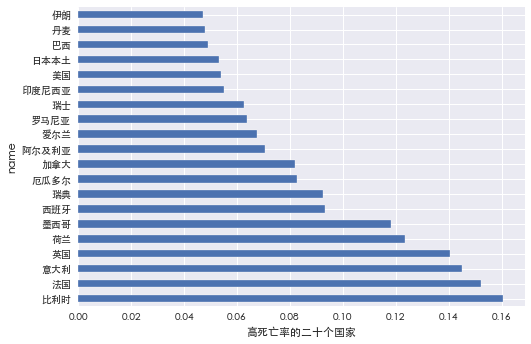

In [225]:

# aly_data.set_index(["name"], inplace=True)
#治愈率排名倒数
# aly_data[aly_data['confirm'] > 10000].sort_values(by = 'death_rate',ascending = False)[0:20]
aly_data[aly_data['confirm']>10000].death_rate.sort_values(ascending = False)[0:20].plot.barh()
# data.粉丝数量.sort_values(ascending = False)[0:10].plot.barh()
plt.xlabel('高死亡率的二十个国家')

## 测试—获取美国的数据

In [717]:
response_test = session.post('https://api.inews.qq.com/newsqa/v1/automation/foreign/daily/list?country=%E7%BE%8E%E5%9B%BD&',verify = False, headers = header)

In [718]:
cov_test = json.loads(response_test.text)


In [719]:
cov_test

{'ret': 0,
 'info': '',
 'data': [{'date': '01.28',
   'confirm_add': 0,
   'confirm': 5,
   'heal': 0,
   'dead': 0},
  {'date': '01.29', 'confirm_add': 0, 'confirm': 5, 'heal': 0, 'dead': 0},
  {'date': '01.30', 'confirm_add': 1, 'confirm': 6, 'heal': 0, 'dead': 0},
  {'date': '01.31', 'confirm_add': 0, 'confirm': 6, 'heal': 0, 'dead': 0},
  {'date': '02.01', 'confirm_add': 1, 'confirm': 7, 'heal': 0, 'dead': 0},
  {'date': '02.02', 'confirm_add': 1, 'confirm': 8, 'heal': 0, 'dead': 0},
  {'date': '02.03', 'confirm_add': 3, 'confirm': 11, 'heal': 1, 'dead': 0},
  {'date': '02.04', 'confirm_add': 0, 'confirm': 11, 'heal': 1, 'dead': 0},
  {'date': '02.05', 'confirm_add': 0, 'confirm': 11, 'heal': 1, 'dead': 0},
  {'date': '02.06', 'confirm_add': 1, 'confirm': 12, 'heal': 1, 'dead': 0},
  {'date': '02.07', 'confirm_add': 0, 'confirm': 12, 'heal': 1, 'dead': 0},
  {'date': '02.08', 'confirm_add': 0, 'confirm': 12, 'heal': 1, 'dead': 0},
  {'date': '02.09', 'confirm_add': 0, 'confirm': 1

In [720]:
date = jsonpath.jsonpath(cov_test,"$..date")
confirm_add = jsonpath.jsonpath(cov_test,"$..confirm_add")
confirm = jsonpath.jsonpath(cov_test,"$..confirm")
heal = jsonpath.jsonpath(cov_test,"$..heal")
dead = jsonpath.jsonpath(cov_test,"$..dead")

In [721]:
test_dic={"date":date,
            "confirm_add" : confirm_add,
           "confirm" : confirm,
            "heal":heal,
            "dead":dead,
            "countryname" : '美国'
           
  }#将列表转换成字典
test_data = pd.DataFrame(test_dic)#将字典转换成为数据框

In [723]:
#添加两个率
test_data['cure_rate'] = test_data['heal']/test_data['confirm']
test_data['death_rate'] = test_data['dead']/test_data['confirm']

In [724]:
test_data

,date,confirm_add,confirm,heal,dead,countryname,cure_rate,death_rate
0,01.28,0,5,0,0,美国,0.000000,0.000000
1,01.29,0,5,0,0,美国,0.000000,0.000000
2,01.30,1,6,0,0,美国,0.000000,0.000000
3,01.31,0,6,0,0,美国,0.000000,0.000000
4,02.01,1,7,0,0,美国,0.000000,0.000000
5,02.02,1,8,0,0,美国,0.000000,0.000000
6,02.03,3,11,1,0,美国,0.090909,0.000000
7,02.04,0,11,1,0,美国,0.090909,0.000000
8,02.05,0,11,1,0,美国,0.090909,0.000000
9,02.06,1,12,1,0,美国,0.083333,0.000000


In [706]:
#弄一个country list
# name
#把list名称转码
#建立一个url_list
#已完成
#获取n个dataframe
#需要再加一列叫做country_name

In [89]:
# #fail
# import urllib
# url_z = 'http://test.com/s?wd=英国'   #如果此网站编码是gbk的话，需要进行解码，从gbk解码成unicode，再从Unicode编码编码为utf-8格式。
# url_z = url_z.decode('gbk', 'replace')
# print(urllib.quote(url.encode('utf-8', 'replace')))
# # 结果: http%3a%2f%2ftest.com%2fs%3fwd%3d%e5%93%88%e5%93%88


In [90]:
# #fail
# import sys,urllib   
# s = '杭州' 
# urllib.quote(s.decode(sys.stdin.encoding).encode('gbk'))  
# # %BA%BC%D6%DD  
# urllib.quote(s.decode(sys.stdin.encoding).encode('utf8'))  
# # '%E6%9D%AD%E5%B7%9E' 

## 获取国家名称对应的url 编码

In [80]:
#success
from urllib.parse import quote
# s = '英国'
# print(quote(s)) 
# 输出：%E4%BE%8B%E5%AD%90

%E8%8B%B1%E5%9B%BD


In [86]:

name_url = []
final_url = []
for i in name:
    name_url.append(quote(i))
    get_url = "https://api.inews.qq.com/newsqa/v1/automation/foreign/daily/list?country="+str(quote(i))+"&"
    final_url.append(get_url)

In [705]:
# dic_list[6]
# # test_data = pd.DataFrame(dic_list[6])
# #累计确诊，累计治愈，治愈率，累计死亡和死亡率数据，分海内外，进行对比
# cure_rate = heal/confirm
# dead_rate = dead/confirm

## 取得所有国家的url信息

In [88]:
final_url

['https://api.inews.qq.com/newsqa/v1/automation/foreign/daily/list?country=%E7%BE%8E%E5%9B%BD&',
 'https://api.inews.qq.com/newsqa/v1/automation/foreign/daily/list?country=%E5%B7%B4%E8%A5%BF&',
 'https://api.inews.qq.com/newsqa/v1/automation/foreign/daily/list?country=%E4%BF%84%E7%BD%97%E6%96%AF&',
 'https://api.inews.qq.com/newsqa/v1/automation/foreign/daily/list?country=%E5%8D%B0%E5%BA%A6&',
 'https://api.inews.qq.com/newsqa/v1/automation/foreign/daily/list?country=%E8%8B%B1%E5%9B%BD&',
 'https://api.inews.qq.com/newsqa/v1/automation/foreign/daily/list?country=%E8%A5%BF%E7%8F%AD%E7%89%99&',
 'https://api.inews.qq.com/newsqa/v1/automation/foreign/daily/list?country=%E6%84%8F%E5%A4%A7%E5%88%A9&',
 'https://api.inews.qq.com/newsqa/v1/automation/foreign/daily/list?country=%E7%A7%98%E9%B2%81&',
 'https://api.inews.qq.com/newsqa/v1/automation/foreign/daily/list?country=%E4%BC%8A%E6%9C%97&',
 'https://api.inews.qq.com/newsqa/v1/automation/foreign/daily/list?country=%E6%B3%95%E5%9B%BD&',
 'h

## 各个国家折线图

In [ ]:
# date = jsonpath.jsonpath(data_z,"$.chinaDayList[*].date")

In [622]:
#获取指定国家的数据
def get_country_data(num):
    
    response_test = session.post(final_url[num],verify = False, headers = header)

    cov_test = json.loads(response_test.text)
    date = jsonpath.jsonpath(cov_test,"$.data[*].date")
    confirm_add = jsonpath.jsonpath(cov_test,"$.data[*].confirm_add")
    confirm = jsonpath.jsonpath(cov_test,"$.data[*].confirm")
    heal = jsonpath.jsonpath(cov_test,"$.data[*].heal")
    dead = jsonpath.jsonpath(cov_test,"$.data[*].dead")
    test_dic={"date":date,
                "confirm_add" : confirm_add,
               "confirm" : confirm,
                "heal":heal,
                "dead":dead,
                "countryname" : name[num]


      }#将列表转换成字典
    test_data = pd.DataFrame(test_dic)#将字典转换成为数据框
    test_data['cure_rate'] =test_data["heal"]/test_data['confirm']
    test_data['death_rate'] =test_data["dead"]/test_data['confirm']
    return test_data

In [629]:
#找国家
print(name.index('塞尔维亚'))

53


In [628]:
#根据索引确定国家
Japan_data = get_country_data(48)
Italy_data = get_country_data(6)
France_data = get_country_data(9)
German_data = get_country_data(10)
Serbia_data = get_country_data(53)

### 日本数据

Text(0.5, 0, '日期')

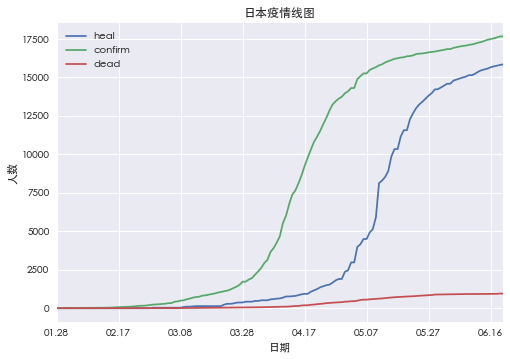

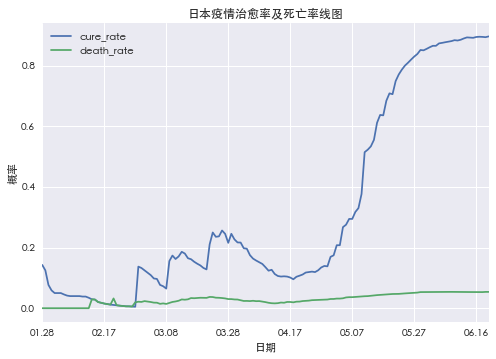

In [631]:
#图1
pd.DataFrame(Japan_data)[['date','heal','confirm','dead']].plot.line(x = 'date')
plt.title('日本疫情线图')
plt.ylabel('人数')
plt.xlabel('日期')
#图2
pd.DataFrame(Japan_data)[['date','cure_rate','death_rate']].plot.line(x = 'date')
plt.title('日本疫情治愈率及死亡率线图')
plt.ylabel('概率')
plt.xlabel('日期')


### 德国数据

Text(0.5, 0, '日期')

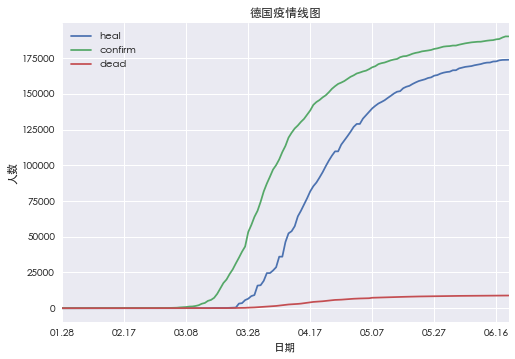

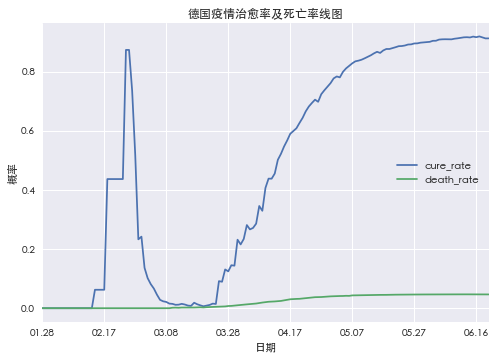

In [632]:
#图1
pd.DataFrame(German_data)[['date','heal','confirm','dead']].plot.line(x = 'date')
plt.title('德国疫情线图')
plt.ylabel('人数')
plt.xlabel('日期')
#图2
pd.DataFrame(German_data)[['date','cure_rate','death_rate']].plot.line(x = 'date')
plt.title('德国疫情治愈率及死亡率线图')
plt.ylabel('概率')
plt.xlabel('日期')


In [647]:
German_data

,date,confirm_add,confirm,heal,dead,countryname,cure_rate,death_rate
0,01.28,0,1,0,0,德国,0.000000,0.000000
1,01.29,3,4,0,0,德国,0.000000,0.000000
2,01.30,0,4,0,0,德国,0.000000,0.000000
3,01.31,2,6,0,0,德国,0.000000,0.000000
4,02.01,1,7,0,0,德国,0.000000,0.000000
5,02.02,3,10,0,0,德国,0.000000,0.000000
6,02.03,0,10,0,0,德国,0.000000,0.000000
7,02.04,2,12,0,0,德国,0.000000,0.000000
8,02.05,0,12,0,0,德国,0.000000,0.000000
9,02.06,0,12,0,0,德国,0.000000,0.000000


### 法国数据

Text(0.5, 0, '日期')

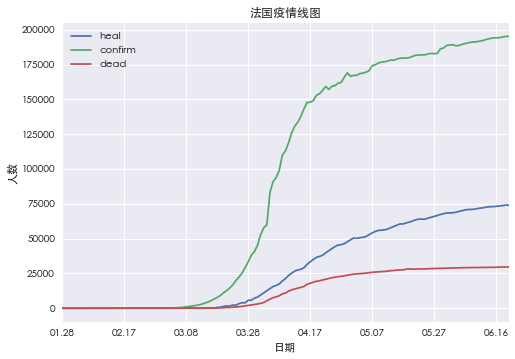

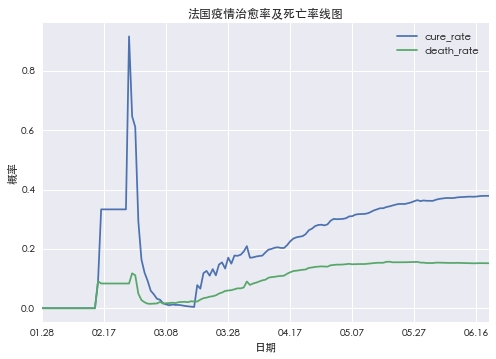

In [633]:
#图1
pd.DataFrame(France_data)[['date','heal','confirm','dead']].plot.line(x = 'date')
plt.title('法国疫情线图')
plt.ylabel('人数')
plt.xlabel('日期')
#图2
pd.DataFrame(France_data)[['date','cure_rate','death_rate']].plot.line(x = 'date')
plt.title('法国疫情治愈率及死亡率线图')
plt.ylabel('概率')
plt.xlabel('日期')

### 意大利数据

Text(0.5, 0, '日期')

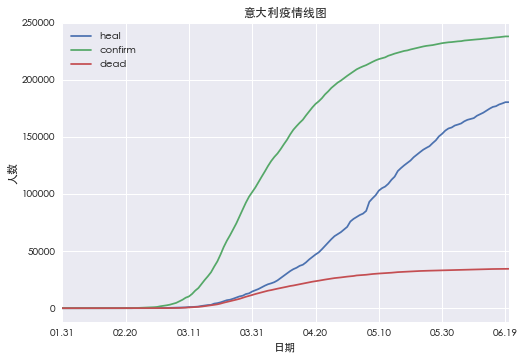

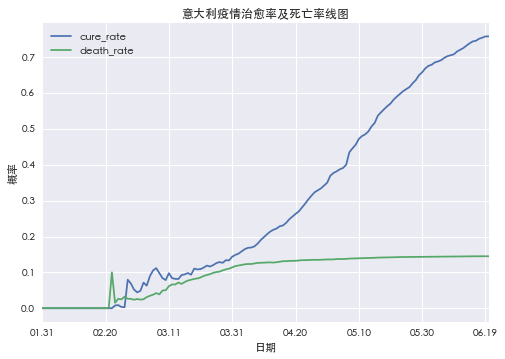

In [636]:
#图1
pd.DataFrame(Italy_data)[['date','heal','confirm','dead']].plot.line(x = 'date')
plt.title('意大利疫情线图')
plt.ylabel('人数')
plt.xlabel('日期')
#图2
pd.DataFrame(Italy_data)[['date','cure_rate','death_rate']].plot.line(x = 'date')
plt.title('意大利疫情治愈率及死亡率线图')
plt.ylabel('概率')
plt.xlabel('日期')

In [646]:
Italy_data

,date,confirm_add,confirm,heal,dead,countryname,cure_rate,death_rate
0,01.31,2,2,0,0,意大利,0.000000,0.000000
1,02.01,0,2,0,0,意大利,0.000000,0.000000
2,02.02,0,2,0,0,意大利,0.000000,0.000000
3,02.03,0,2,0,0,意大利,0.000000,0.000000
4,02.04,0,2,0,0,意大利,0.000000,0.000000
5,02.05,0,2,0,0,意大利,0.000000,0.000000
6,02.06,0,2,0,0,意大利,0.000000,0.000000
7,02.07,1,3,0,0,意大利,0.000000,0.000000
8,02.08,0,3,0,0,意大利,0.000000,0.000000
9,02.09,0,3,0,0,意大利,0.000000,0.000000


### 塞尔维亚数据

Text(0.5, 0, '日期')

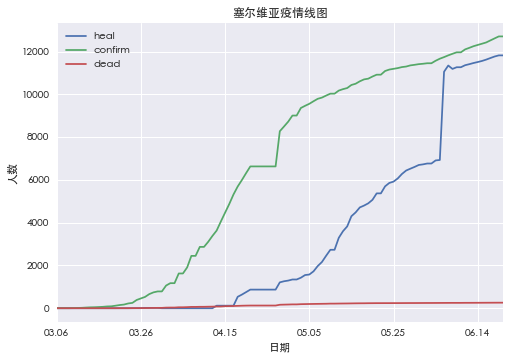

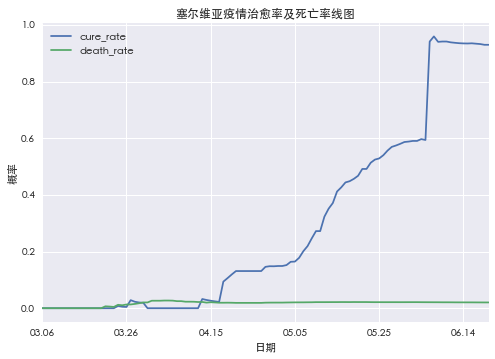

In [637]:
#图1
pd.DataFrame(Serbia_data)[['date','heal','confirm','dead']].plot.line(x = 'date')
plt.title('塞尔维亚疫情线图')
plt.ylabel('人数')
plt.xlabel('日期')
#图2
pd.DataFrame(Serbia_data)[['date','cure_rate','death_rate']].plot.line(x = 'date')
plt.title('塞尔维亚疫情治愈率及死亡率线图')
plt.ylabel('概率')
plt.xlabel('日期')

In [639]:
Serbia_data[30:]

,date,confirm_add,confirm,heal,dead,countryname,cure_rate,death_rate
30,04.05,0,1624,0,44,塞尔维亚,0.000000,0.027094
31,04.06,284,1908,0,51,塞尔维亚,0.000000,0.026730
32,04.07,539,2447,0,61,塞尔维亚,0.000000,0.024928
33,04.08,0,2447,0,61,塞尔维亚,0.000000,0.024928
34,04.09,420,2867,0,66,塞尔维亚,0.000000,0.023021
35,04.10,0,2867,0,66,塞尔维亚,0.000000,0.023021
36,04.11,238,3105,0,71,塞尔维亚,0.000000,0.022866
37,04.12,275,3380,0,74,塞尔维亚,0.000000,0.021893
38,04.13,250,3630,118,80,塞尔维亚,0.032507,0.022039
39,04.14,424,4054,118,80,塞尔维亚,0.029107,0.019734


### 美国数据

Text(0.5, 0, '日期')

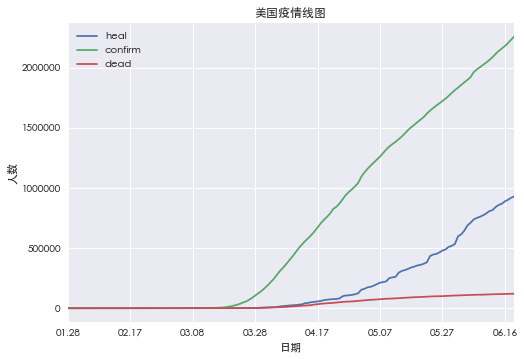

In [583]:
pd.DataFrame(test_data)[['date','heal','confirm','dead']].plot.line(x = 'date')
plt.title('美国疫情线图')
plt.ylabel('人数')
plt.xlabel('日期')

In [702]:
# test_data

Text(0.5, 0, '日期')

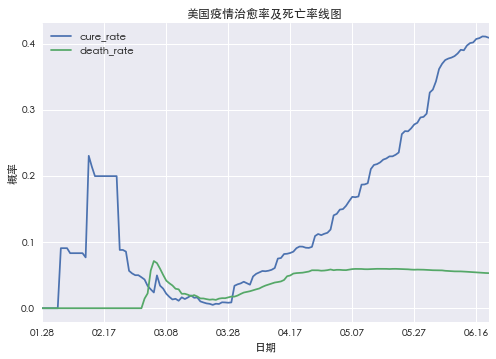

In [598]:
pd.DataFrame(test_data)[['date','cure_rate','death_rate']].plot.line(x = 'date')
plt.title('美国疫情治愈率及死亡率线图')
plt.ylabel('概率')
plt.xlabel('日期')

In [608]:
#美国疫情死亡率最高值
#36	03.04	21	126	3	9	USA	0.023810	0.071429

### 中国数据

## 数据来自于后面的 中国总体数据 

In [648]:
data_test_z

,date,country,confirm,heal,dead,suspect,severe,input_case,cure_rate,death_rate
0,2020-01-20,中国,291,25,6,54,0,0,0.085911,0.020619
1,2020-01-21,中国,440,25,9,37,102,0,0.056818,0.020455
2,2020-01-22,中国,571,28,17,393,95,0,0.049037,0.029772
3,2020-01-23,中国,830,34,25,1072,177,0,0.040964,0.030120
4,2020-01-24,中国,1287,38,41,1965,237,0,0.029526,0.031857
5,2020-01-25,中国,1975,49,56,2684,324,0,0.024810,0.028354
6,2020-01-26,中国,2744,51,80,5794,461,0,0.018586,0.029155
7,2020-01-27,中国,4515,60,106,6973,976,0,0.013289,0.023477
8,2020-01-28,中国,5974,103,132,9239,1239,0,0.017241,0.022096
9,2020-01-29,中国,7711,124,170,12167,1370,0,0.016081,0.022046


Text(0.5, 0, '日期')

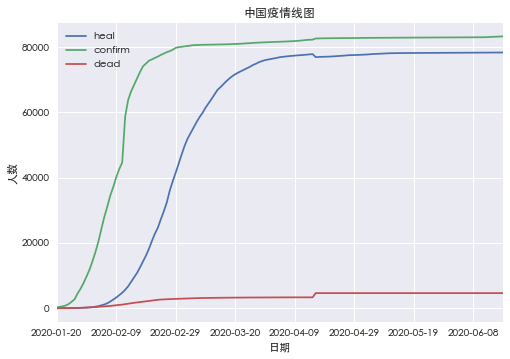

In [586]:
data_test_z[['date','heal','confirm','dead']].plot.line(x = 'date')
plt.title('中国疫情线图')
plt.ylabel('人数')
plt.xlabel('日期')

Text(0.5, 0, '日期')

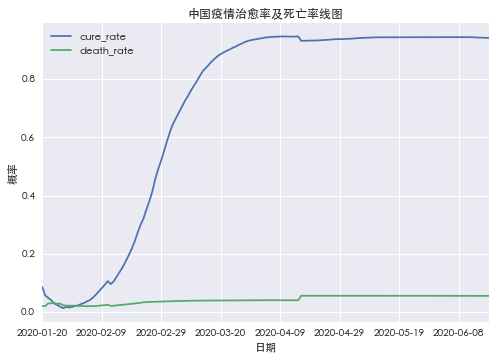

In [610]:
pd.DataFrame(data_test_z)[['date','cure_rate','death_rate']].plot.line(x = 'date')
plt.title('中国疫情治愈率及死亡率线图')
plt.ylabel('概率')
plt.xlabel('日期')

## 测试结束

##### 海外国家疫情信息循环（取得数据不太对，需要改为精确索引，改正之后的例子在上面）

In [151]:
import time
dic_list = []

count = 0
for i in final_url:
    time.sleep(3)
    country_name = name[count]
    count = count + 1
    response_test = session.post(i,verify = False, headers = header)
    
    cov_test = json.loads(response_test.text)
    date = jsonpath.jsonpath(cov_test,"$..date")
    confirm_add = jsonpath.jsonpath(cov_test,"$..confirm_add")
    confirm = jsonpath.jsonpath(cov_test,"$..confirm")
    heal = jsonpath.jsonpath(cov_test,"$..heal")
    dead = jsonpath.jsonpath(cov_test,"$..dead")

    test_dic={"date":date,
            "confirm_add" : confirm_add,
           "confirm" : confirm,
            "heal":heal,
            "dead":dead,
            "countryname" : country_name
           
      }#将列表转换成字典
    percentage = count/len(final_url)
    dic_list.append(test_dic)
    print('已完成第%d个,进度%f' %(count,percentage))
#     test_data = pd.DataFrame(test_dic)#将字典转换成为数据框

已完成第1个,进度0.005495
已完成第2个,进度0.010989
已完成第3个,进度0.016484
已完成第4个,进度0.021978
已完成第5个,进度0.027473
已完成第6个,进度0.032967
已完成第7个,进度0.038462
已完成第8个,进度0.043956
已完成第9个,进度0.049451
已完成第10个,进度0.054945
已完成第11个,进度0.060440
已完成第12个,进度0.065934
已完成第13个,进度0.071429
已完成第14个,进度0.076923
已完成第15个,进度0.082418
已完成第16个,进度0.087912
已完成第17个,进度0.093407
已完成第18个,进度0.098901
已完成第19个,进度0.104396
已完成第20个,进度0.109890
已完成第21个,进度0.115385
已完成第22个,进度0.120879
已完成第23个,进度0.126374
已完成第24个,进度0.131868
已完成第25个,进度0.137363
已完成第26个,进度0.142857
已完成第27个,进度0.148352
已完成第28个,进度0.153846
已完成第29个,进度0.159341
已完成第30个,进度0.164835
已完成第31个,进度0.170330
已完成第32个,进度0.175824
已完成第33个,进度0.181319
已完成第34个,进度0.186813
已完成第35个,进度0.192308
已完成第36个,进度0.197802
已完成第37个,进度0.203297
已完成第38个,进度0.208791
已完成第39个,进度0.214286
已完成第40个,进度0.219780
已完成第41个,进度0.225275
已完成第42个,进度0.230769
已完成第43个,进度0.236264
已完成第44个,进度0.241758
已完成第45个,进度0.247253
已完成第46个,进度0.252747
已完成第47个,进度0.258242
已完成第48个,进度0.263736
已完成第49个,进度0.269231
已完成第50个,进度0.274725
已完成第51个,进度0.280220
已完成第52个,进度0.285714
已完成第53个,进度0.291209
已完

In [178]:
test_data = pd.DataFrame(dic_list[10])#将字典转换成为数据框

In [697]:
## index索引想要的国家
print(name.index('加拿大'))
# pd.DataFrame(dic_list[11])

16


In [696]:
# pd.DataFrame(dic_list[48])[['date','heal']].plot.line(x = 'date')
# # len(dic_list)
# print("网站名：{name}, 地址 {url}".format(name="菜鸟教程", url="www.runoob.com"))
# {name}.format(name="菜鸟教程")

In [237]:
#省份名称list
pro_name = ['河北','山西','辽宁','吉林','黑龙江','江苏','浙江','安徽','福建','江西','山东','河南','湖北','湖南','广东','海南','四川','贵州','云南','陕西','甘肃','青海','台湾','北京','天津','上海','重庆','香港','澳门','内蒙古','广西','宁夏','西藏','新疆']

In [239]:
#省份url list 需要转码
pro_name_url = []
#最终需要请求的url
pro_final_url = []
for i in pro_name:
    pro_name_url.append(quote(i))
    get_pro_url = "https://api.inews.qq.com/newsqa/v1/query/pubished/daily/list?province="+str(quote(i))+"&"
    pro_final_url.append(get_pro_url)

## 单独省份测试——河北

In [243]:
#取出河北省url
pro_final_url[0]

'https://api.inews.qq.com/newsqa/v1/query/pubished/daily/list?province=%E6%B2%B3%E5%8C%97&'

In [244]:
#先post再用json解析网页成分
response_test = session.post('https://api.inews.qq.com/newsqa/v1/query/pubished/daily/list?province=%E6%B2%B3%E5%8C%97&',verify = False, headers = header)
cov_test = json.loads(response_test.text)


In [699]:
# cov_test

In [246]:
#jsonpath 的模糊查询，后期改掉了，改成了精确查询，不过这个在这里也能用，在海外国家部分不好用了，已改
date = jsonpath.jsonpath(cov_test,"$..date")
province = jsonpath.jsonpath(cov_test,"$..province")
confirm = jsonpath.jsonpath(cov_test,"$..confirm")
confirm_add = jsonpath.jsonpath(cov_test,"$..confirm_add")
heal = jsonpath.jsonpath(cov_test,"$..heal")
dead = jsonpath.jsonpath(cov_test,"$..dead")
newConfirm = jsonpath.jsonpath(cov_test,"$..newConfirm")
newHeal = jsonpath.jsonpath(cov_test,"$..newHeal")
newDead = jsonpath.jsonpath(cov_test,"$..newDead")

In [247]:
test_dic={"date":date,
          "province":province,
          "confirm" : confirm,
            "confirm_add" : confirm_add,
            "heal":heal,
            "dead":dead,
            "newConfirm":newConfirm,
          "newHeal":newHeal,
          "newDead":newDead
           
      }#将列表转换成字典
#     percentage = count/len(final_url)
data_test_z = pd.DataFrame(test_dic)

In [248]:
data_test_z

,date,province,confirm,confirm_add,heal,dead,newConfirm,newHeal,newDead
0,01.29,河北,65,17,0,1,0,0,0
1,01.30,河北,82,17,0,1,17,0,0
2,01.31,河北,96,14,0,1,14,0,0
3,02.01,河北,104,8,3,1,8,3,0
4,02.02,河北,113,9,3,1,9,0,0
5,02.03,河北,126,13,3,1,13,0,0
6,02.04,河北,135,9,4,1,9,1,0
7,02.05,河北,157,22,7,1,22,3,0
8,02.06,河北,171,14,16,1,14,9,0
9,02.07,河北,195,24,25,1,24,9,0


## 测试结束

## 获取34省份数据

In [249]:
import time
pro_dic_list = []

count = 0
for i in pro_final_url:
    time.sleep(3)

    count = count + 1
    response_test = session.post(i,verify = False, headers = header)
    
    cov_test = json.loads(response_test.text)
    date = jsonpath.jsonpath(cov_test,"$..date")
    province = jsonpath.jsonpath(cov_test,"$..province")
    confirm = jsonpath.jsonpath(cov_test,"$..confirm")
    confirm_add = jsonpath.jsonpath(cov_test,"$..confirm_add")
    heal = jsonpath.jsonpath(cov_test,"$..heal")
    dead = jsonpath.jsonpath(cov_test,"$..dead")
    newConfirm = jsonpath.jsonpath(cov_test,"$..newConfirm")
    newHeal = jsonpath.jsonpath(cov_test,"$..newHeal")
    newDead = jsonpath.jsonpath(cov_test,"$..newDead")

    test_dic={"date":date,
          "province":province,
          "confirm" : confirm,
            "confirm_add" : confirm_add,
            "heal":heal,
            "dead":dead,
            "newConfirm":newConfirm,
          "newHeal":newHeal,
          "newDead":newDead
           
      }#将列表转换成字典
    percentage = count/len(pro_final_url)
    pro_dic_list.append(test_dic)
    print('已完成第%d个,进度%f' %(count,percentage))
#     test_data = pd.DataFrame(test_dic)#将字典转换成为数据框

已完成第1个,进度0.005495
已完成第2个,进度0.010989
已完成第3个,进度0.016484
已完成第4个,进度0.021978
已完成第5个,进度0.027473
已完成第6个,进度0.032967
已完成第7个,进度0.038462
已完成第8个,进度0.043956
已完成第9个,进度0.049451
已完成第10个,进度0.054945
已完成第11个,进度0.060440
已完成第12个,进度0.065934
已完成第13个,进度0.071429
已完成第14个,进度0.076923
已完成第15个,进度0.082418
已完成第16个,进度0.087912
已完成第17个,进度0.093407
已完成第18个,进度0.098901
已完成第19个,进度0.104396
已完成第20个,进度0.109890
已完成第21个,进度0.115385
已完成第22个,进度0.120879
已完成第23个,进度0.126374
已完成第24个,进度0.131868
已完成第25个,进度0.137363
已完成第26个,进度0.142857
已完成第27个,进度0.148352
已完成第28个,进度0.153846
已完成第29个,进度0.159341
已完成第30个,进度0.164835
已完成第31个,进度0.170330
已完成第32个,进度0.175824
已完成第33个,进度0.181319
已完成第34个,进度0.186813


In [695]:
# hebei_data = pd.DataFrame(pro_dic_list[0])
# hebei_data

# 索引单独省份

In [252]:
print(pro_name.index('湖北'))
# name[]

12


In [658]:
hubei_data = pd.DataFrame(pro_dic_list[12])
# hubei_data.set_index(["date"], inplace=True)
hubei_data[['confirm_add']] = hubei_data[['confirm_add']].astype(int)

In [663]:
#计算治愈率和死亡率
hubei_data
hubei_data['cure_rate'] = hubei_data['heal']/hubei_data['confirm']
hubei_data['death_rate'] = hubei_data['dead']/hubei_data['confirm']

In [682]:
#最终湖北数据
hubei_data

,date,province,confirm,confirm_add,heal,dead,newConfirm,newHeal,newDead,cure_rate,death_rate
0,01.20,湖北,270,72,25,6,0,0,0,0.092593,0.022222
1,01.21,湖北,375,105,28,9,105,3,3,0.074667,0.024000
2,01.22,湖北,444,69,28,17,69,0,8,0.063063,0.038288
3,01.23,湖北,549,105,31,24,105,3,7,0.056466,0.043716
4,01.24,湖北,729,180,32,39,180,1,15,0.043896,0.053498
5,01.25,湖北,1052,323,42,52,323,10,13,0.039924,0.049430
6,01.26,湖北,1423,371,44,76,371,2,24,0.030921,0.053408
7,01.27,湖北,2714,1291,47,100,1291,3,24,0.017318,0.036846
8,01.28,湖北,3554,840,80,125,840,33,25,0.022510,0.035172
9,01.29,湖北,4586,1032,90,162,1032,10,37,0.019625,0.035325


In [684]:
# hubei_data['date'] = pd.to_datetime(hubei_data['date'],format='%m.%d')
# hubei_data['date'] = hubei_data['date'].astype('str')
#修改index为date
hubei_data.set_index(["date"], inplace=True)

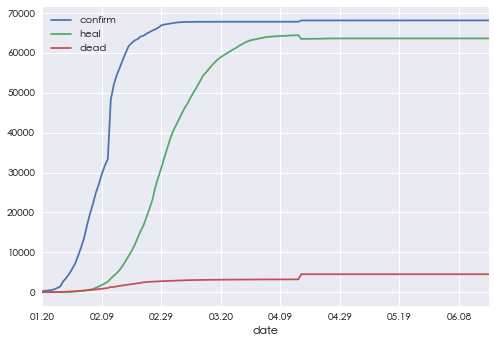

In [685]:
hubei_data[['confirm','heal','dead']].plot.line()

In [701]:
# hubei_data

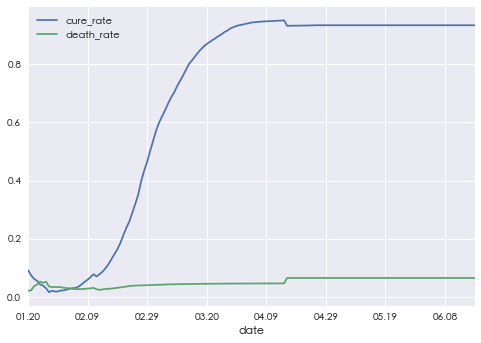

In [686]:
#死亡率治愈率曲线
hubei_data[['cure_rate','death_rate']].plot.line()

In [694]:
#json测试


# 六个国家的对比分析

In [863]:
#在进行 [:-2]取到18号
#日本01.28开始
Japan = Japan_data[3:-2]
#意大利01.31
Italy = Italy_data[:-2] 
#法国01.28
France = France_data[3:-2] 
#德国01.28
German = German_data[3:-2]
#中国数据 01.20开始
China = data_test_z[11:]
#塞尔维亚03.26，剔除塞尔维亚 加入法国，所有数据从01.31开始
# Serbia_data[:-2] 
#美国数据 01.28开始
USA = test_data[3:-2]

## 多个list组成dataframe

In [869]:
test_dic_mul ={
#     "date":date,
    "Japan":Japan['confirm'],
    'Italy':Italy['confirm'],
    "China":China['confirm'],
    'USA':USA['confirm'],
    'France':France['confirm'],
    "German":German['confirm']
}


In [870]:
#报错 需要修改index为日期
confirm_data = pd.DataFrame(test_dic_mul)

In [871]:
confirm_data

,Japan,Italy,China,USA,France,German
index,,,,,,
0,17,2,11791,6,6,6
1,20,2,14380,7,6,7
2,20,2,17205,8,6,10
3,20,2,20438,11,6,10
4,22,2,24324,11,6,12
5,24,2,28018,11,6,12
6,25,2,31161,12,6,12
7,25,3,34546,12,6,13
8,25,3,37198,12,11,13


In [838]:
# confirm_data

In [872]:
#index换成日期
test_date = pd.date_range(start='31/1/2020',periods=140)
confirm_data['date'] = test_date
confirm_data.set_index(["date"], inplace=True)
confirm_data.plot.line()

In [876]:
# confirm_data.set_index(["date"], inplace=True)
# confirm_data['date'] = test_date

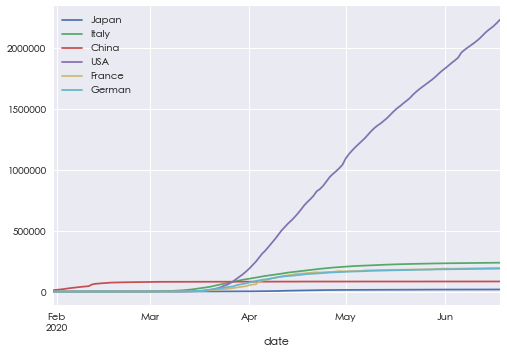

In [877]:
# confirm_data.plot.line()

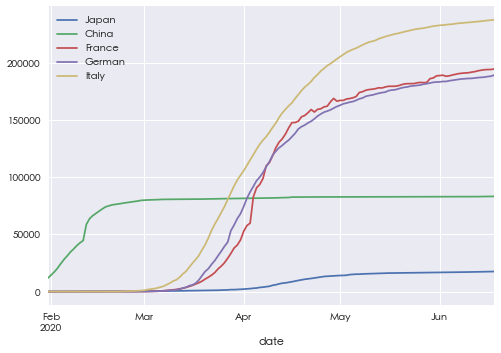

In [881]:
confirm_data[['Japan','China','France','German','Italy']].plot.line()

## 做一个def看后面四类数据

In [923]:
def get_dic_mul(Index):
    #在进行 [:-2]取到18号
    #日本01.28开始
    Japan = Japan_data[3:-2]
    #意大利01.31
    Italy = Italy_data[:-2] 
    #法国01.28
    France = France_data[3:-2] 
    #德国01.28
    German = German_data[3:-2]
    #中国数据 01.20开始
    China = data_test_z[11:]
    #塞尔维亚03.26，剔除塞尔维亚 加入法国，所有数据从01.31开始
    # Serbia_data[:-2] 
    #美国数据 01.28开始
    USA = test_data[3:-2]

    Japan['index'] = range(0,140)
    Japan.set_index('index', inplace=True)
    USA['index'] = range(0,140)
    USA.set_index(["index"], inplace=True)
    German['index'] = range(0,140)
    German.set_index(["index"], inplace=True)
    France['index'] = range(0,140)
    France.set_index(["index"], inplace=True)
    Italy['index'] = range(0,140)
    Italy.set_index(["index"], inplace=True)
    China['index'] = range(0,140)
    China.set_index(["index"], inplace=True)

    test_dic_mul ={
    #     "date":date,
        "Japan":Japan[Index],
        'Italy':Italy[Index],
        "China":China[Index],
        'USA':USA[Index],
        'France':France[Index],
        "German":German[Index]
    }
    return test_dic_mul

In [924]:
heal_data = pd.DataFrame(get_dic_mul('heal'))

In [925]:
dead_data = pd.DataFrame(get_dic_mul('dead'))

In [926]:
death_rate_data = pd.DataFrame(get_dic_mul('death_rate'))

In [927]:
cure_rate_data = pd.DataFrame(get_dic_mul('cure_rate'))

In [928]:
confirm_data = pd.DataFrame(get_dic_mul('confirm'))

In [929]:
#index换成日期
def tidy_dataframe(dataframe):
    test_date = pd.date_range(start='31/1/2020',periods=140)
    dataframe['date'] = test_date
    dataframe.set_index(["date"], inplace=True)
    return dataframe

In [905]:
# tidy_dataframe(heal_data)

In [930]:
final_heal = tidy_dataframe(heal_data)
final_dead = tidy_dataframe(dead_data)
final_death_rate = tidy_dataframe(death_rate_data)
final_cure_rate = tidy_dataframe(cure_rate_data)
final_confirm = tidy_dataframe(confirm_data)

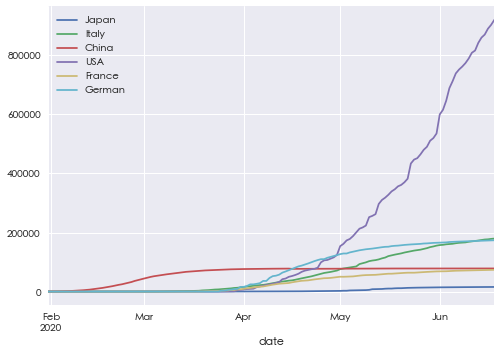

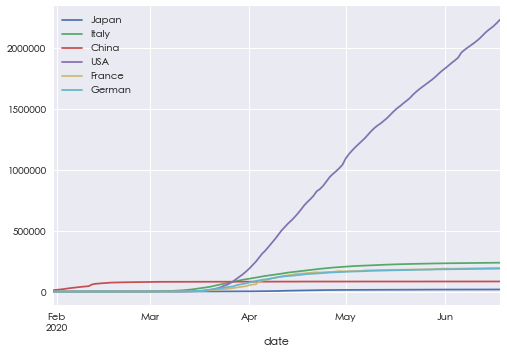

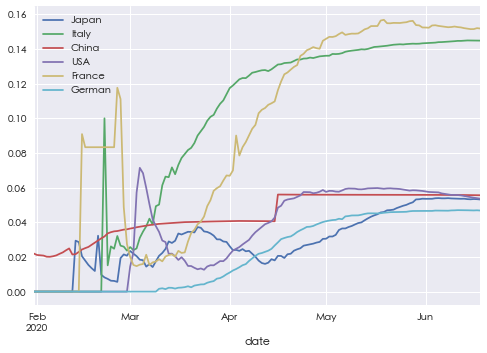

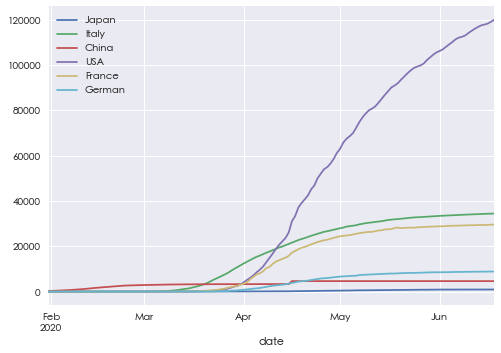

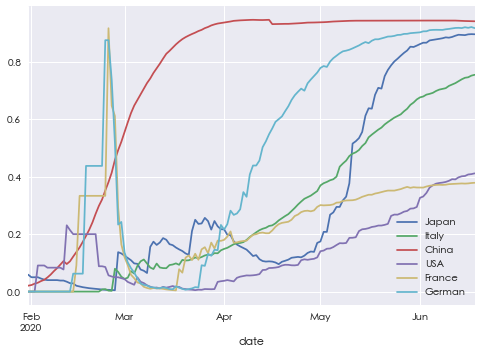

In [931]:
final_heal.plot.line()
final_confirm.plot.line()
final_death_rate.plot.line()
final_dead.plot.line()
final_cure_rate.plot.line()

In [934]:
China[60:]

,date,country,confirm,heal,dead,suspect,severe,input_case,cure_rate,death_rate
index,,,,,,,,,,
60,2020-03-31,中国,81554,76238,3312,172,466,806,0.934816,0.040611
61,2020-04-01,中国,81589,76408,3318,153,429,841,0.936499,0.040667
62,2020-04-02,中国,81620,76571,3322,135,379,870,0.938140,0.040701
63,2020-04-03,中国,81639,76751,3326,114,331,888,0.940127,0.040740
64,2020-04-04,中国,81669,76964,3330,107,295,913,0.942389,0.040774
65,2020-04-05,中国,81708,77078,3331,88,265,951,0.943335,0.040767
66,2020-04-06,中国,81740,77167,3331,89,211,983,0.944054,0.040751
67,2020-04-07,中国,81802,77279,3333,83,189,1042,0.944708,0.040745
68,2020-04-08,中国,81865,77370,3335,73,176,1103,0.945093,0.040738


## 中国总体数据(网易接口)

In [736]:
url = 'https://c.m.163.com/ug/api/wuhan/app/data/list-total'   # 定义要访问的地址
r = requests.get(url, headers=header)  # 使用requests发起请求
print(r.status_code) 
data_json = json.loads(r.text)
data_json

200


{'reqId': 15926039519143980,
 'code': 10000,
 'msg': '成功',
 'data': {'chinaTotal': {'today': {'confirm': 3,
    'suspect': 0,
    'heal': 2,
    'dead': 0,
    'severe': 0,
    'storeConfirm': 1,
    'input': 0},
   'total': {'confirm': 84943,
    'suspect': 7,
    'heal': 79951,
    'dead': 4645,
    'severe': 13,
    'input': 1864},
   'extData': {'noSymptom': 110, 'incrNoSymptom': 5}},
  'chinaDayList': [{'date': '2020-01-20',
    'today': {'confirm': 291,
     'suspect': 27,
     'heal': 25,
     'dead': 6,
     'severe': 0,
     'storeConfirm': None},
    'total': {'confirm': 291,
     'suspect': 54,
     'heal': 25,
     'dead': 6,
     'severe': 0,
     'input': 0},
    'extData': None,
    'lastUpdateTime': None},
   {'date': '2020-01-21',
    'today': {'confirm': 149,
     'suspect': 26,
     'heal': -25,
     'dead': 3,
     'severe': 0,
     'storeConfirm': None},
    'total': {'confirm': 440,
     'suspect': 37,
     'heal': 25,
     'dead': 9,
     'severe': 102,
     'inp

In [737]:

# suspect  severe input
data_z = data_json['data']
# for i in data_z['chinaDayList']:
#     print(i['total'])
date = jsonpath.jsonpath(data_z,"$.chinaDayList[*].date")
confirm = jsonpath.jsonpath(data_z,"$.chinaDayList[*].total.confirm")
heal = jsonpath.jsonpath(data_z,"$.chinaDayList[*].total.heal")
dead = jsonpath.jsonpath(data_z,"$.chinaDayList[*].total.dead")
suspect = jsonpath.jsonpath(data_z,"$.chinaDayList[*].total.suspect")
severe = jsonpath.jsonpath(data_z,"$.chinaDayList[*].total.severe")
input_case = jsonpath.jsonpath(data_z,"$.chinaDayList[*].total.input")
# province = jsonpath.jsonpath(cov_test,"$..province")
# confirm = jsonpath.jsonpath(cov_test,"$..confirm")
# confirm_add = jsonpath.jsonpath(cov_test,"$..confirm_add")

# newConfirm = jsonpath.jsonpath(cov_test,"$..newConfirm")
# newHeal = jsonpath.jsonpath(cov_test,"$..newHeal")
# newDead = jsonpath.jsonpath(cov_test,"$..newDead")

In [738]:
test_dic={"date":date,
          "country":'中国',
          "confirm" : confirm,
#             "confirm_add" : confirm_add,
            "heal":heal,
            "dead":dead,
            "suspect":suspect,
          "severe":severe,
          "input_case":input_case
           
      }#将列表转换成字典
#     percentage = count/len(final_url)
data_test_z = pd.DataFrame(test_dic)

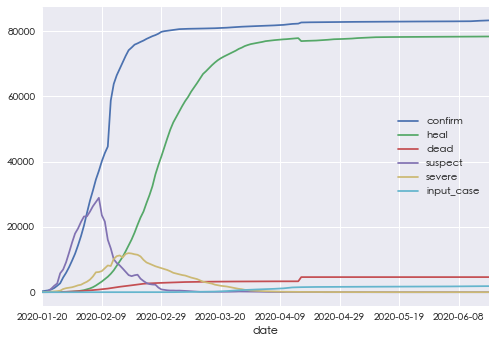

In [739]:
data_test_z['cure_rate'] = data_test_z['heal']/data_test_z['confirm']
data_test_z['death_rate'] = data_test_z['dead']/data_test_z['confirm']

data_test_z[['date','confirm','heal','dead','suspect','severe','input_case']].plot.line(x = 'date')

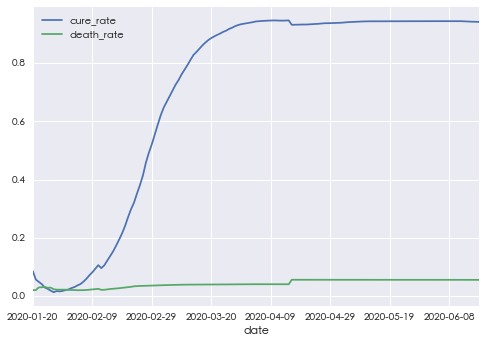

In [740]:
data_test_z[['date','cure_rate','death_rate']].plot.line(x = 'date')

## 三十四省份已经完成（下面的统计失败了）fail

In [316]:
# hb_data[]
# hb_data[['confirm_add']] = hb_data[['confirm_add']].astype(int)

In [319]:
# hb_data.confirm
# hebei_data

In [328]:
hb_data = pd.DataFrame(pro_dic_list[0])
hb_data.set_index(["date"], inplace=True)
hb_data[['confirm_add']] = hb_data[['confirm_add']].astype(int)

In [329]:
sx_data = pd.DataFrame(pro_dic_list[1])
sx_data.set_index(["date"], inplace=True)
sx_data[['confirm_add']] = sx_data[['confirm_add']].astype(int)

In [330]:
ln_data = pd.DataFrame(pro_dic_list[2])
ln_data.set_index(["date"], inplace=True)
ln_data[['confirm_add']] = ln_data[['confirm_add']].astype(int)

In [331]:
jl_data = pd.DataFrame(pro_dic_list[3])
jl_data.set_index(["date"], inplace=True)
jl_data[['confirm_add']] = jl_data[['confirm_add']].astype(int)

In [332]:
# hb_data + sx_data + ln_data + jl_data

In [333]:
hlj_data = pd.DataFrame(pro_dic_list[4])
hlj_data.set_index(["date"], inplace=True)
hlj_data[['confirm_add']] = hlj_data[['confirm_add']].astype(int)

In [334]:
js_data = pd.DataFrame(pro_dic_list[5])
js_data.set_index(["date"], inplace=True)
js_data[['confirm_add']] = js_data[['confirm_add']].astype(int)

In [336]:
zj_data = pd.DataFrame(pro_dic_list[6])
zj_data.set_index(["date"], inplace=True)
zj_data[['confirm_add']] = zj_data[['confirm_add']].astype(int)

In [337]:
ah_data = pd.DataFrame(pro_dic_list[7])
ah_data.set_index(["date"], inplace=True)
ah_data[['confirm_add']] = ah_data[['confirm_add']].astype(int)

In [338]:
fj_data = pd.DataFrame(pro_dic_list[8])
fj_data.set_index(["date"], inplace=True)
fj_data[['confirm_add']] = fj_data[['confirm_add']].astype(int)

In [339]:
jx_data = pd.DataFrame(pro_dic_list[9])
jx_data.set_index(["date"], inplace=True)
jx_data[['confirm_add']] = jx_data[['confirm_add']].astype(int)

In [340]:
sd_data = pd.DataFrame(pro_dic_list[10])
sd_data.set_index(["date"], inplace=True)
sd_data[['confirm_add']] = sd_data[['confirm_add']].astype(int)

In [341]:
hn_data = pd.DataFrame(pro_dic_list[11])
hn_data.set_index(["date"], inplace=True)
hn_data[['confirm_add']] = hn_data[['confirm_add']].astype(int)

In [342]:
hubei_data = pd.DataFrame(pro_dic_list[12])
hubei_data.set_index(["date"], inplace=True)
hubei_data[['confirm_add']] = hubei_data[['confirm_add']].astype(int)

In [343]:
hunan_data = pd.DataFrame(pro_dic_list[13])
hunan_data.set_index(["date"], inplace=True)
hunan_data[['confirm_add']] = hunan_data[['confirm_add']].astype(int)

In [344]:
gd_data = pd.DataFrame(pro_dic_list[14])
gd_data.set_index(["date"], inplace=True)
gd_data[['confirm_add']] = gd_data[['confirm_add']].astype(int)

In [385]:
hainan_data = pd.DataFrame(pro_dic_list[15])
hainan_data.set_index(["date"], inplace=True)
hainan_data[['confirm','confirm_add','heal','dead','newConfirm','newHeal','newDead']] = hainan_data[['confirm','confirm_add','heal','dead','newConfirm','newHeal','newDead']].astype(int)

In [386]:
sc_data = pd.DataFrame(pro_dic_list[16])
sc_data.set_index(["date"], inplace=True)
sc_data[['confirm','confirm_add','heal','dead','newConfirm','newHeal','newDead']] = sc_data[['confirm','confirm_add','heal','dead','newConfirm','newHeal','newDead']].astype(int)

In [688]:
# sc_data + hainan_data  +sh_data

In [347]:
gz_data = pd.DataFrame(pro_dic_list[17])
gz_data.set_index(["date"], inplace=True)
gz_data[['confirm_add']] = gz_data[['confirm_add']].astype(int)

In [349]:
yn_data = pd.DataFrame(pro_dic_list[18])
yn_data.set_index(["date"], inplace=True)
yn_data[['confirm_add']] = yn_data[['confirm_add']].astype(int)

In [350]:
shanxi_data = pd.DataFrame(pro_dic_list[19])
shanxi_data.set_index(["date"], inplace=True)
shanxi_data[['confirm_add']] = shanxi_data[['confirm_add']].astype(int)

In [351]:
gs_data = pd.DataFrame(pro_dic_list[20])
gs_data.set_index(["date"], inplace=True)
gs_data[['confirm_add']] = gs_data[['confirm_add']].astype(int)

In [352]:
qh_data = pd.DataFrame(pro_dic_list[21])
qh_data.set_index(["date"], inplace=True)
qh_data[['confirm_add']] = qh_data[['confirm_add']].astype(int)

In [353]:
tw_data = pd.DataFrame(pro_dic_list[22])
tw_data.set_index(["date"], inplace=True)
tw_data[['confirm_add']] = tw_data[['confirm_add']].astype(int)

In [354]:
bj_data = pd.DataFrame(pro_dic_list[23])
bj_data.set_index(["date"], inplace=True)
bj_data[['confirm_add']] = bj_data[['confirm_add']].astype(int)

In [355]:
tj_data = pd.DataFrame(pro_dic_list[24])
tj_data.set_index(["date"], inplace=True)
tj_data[['confirm_add']] = tj_data[['confirm_add']].astype(int)

In [439]:
# sh_data = pd.DataFrame(pro_dic_list[25])
# sh_data.set_index(["date"], inplace=True)
# sh_data[['confirm','confirm_add','heal','dead','newConfirm','newHeal','newDead']] = sh_data[['confirm','confirm_add','heal','dead','newConfirm','newHeal','newDead']].astype(int)
# sh_data[['confirm_add']] = sh_data[['confirm_add']].astype(int)

In [689]:
# sh_data

In [691]:
# sh_data.confirm_add
# sh_data.confirm_add.astype(int)
# sh_data[['confirm_add']]= pd.to_numeric(sh_data.confirm_add)
# pd.DataFrame(sh_data['confirm_add'],dtype=np.float)


In [692]:
# sh_data

In [446]:
test_aaa =hb_data + sx_data + ln_data + jl_data + hlj_data + js_data + zj_data + ah_data + fj_data + jx_data +sd_data + hn_data+hubei_data + hunan_data + gd_data + hainan_data + sc_data + gz_data + yn_data + shanxi_data + gs_data + qh_data +tw_data + bj_data + tj_data + sh_data + cq_data + xg_data + am_data + nmg_data + gx_data + nx_data + xz_data + xj_data 

In [444]:
test_aaa 
test_aaa.dropna(axis=0, how='any', inplace=True)

In [693]:
# test_aaa

In [362]:
cq_data = pd.DataFrame(pro_dic_list[26])
cq_data.set_index(["date"], inplace=True)
cq_data[['confirm_add']] = cq_data[['confirm_add']].astype(int)

In [363]:
xg_data = pd.DataFrame(pro_dic_list[27])
xg_data.set_index(["date"], inplace=True)
xg_data[['confirm_add']] = xg_data[['confirm_add']].astype(int)

In [364]:
am_data = pd.DataFrame(pro_dic_list[28])
am_data.set_index(["date"], inplace=True)
am_data[['confirm_add']] = am_data[['confirm_add']].astype(int)

In [365]:
nmg_data = pd.DataFrame(pro_dic_list[29])
nmg_data.set_index(["date"], inplace=True)
nmg_data[['confirm_add']] = nmg_data[['confirm_add']].astype(int)

In [366]:
gx_data = pd.DataFrame(pro_dic_list[30])
gx_data.set_index(["date"], inplace=True)
gx_data[['confirm_add']] = gx_data[['confirm_add']].astype(int)

In [367]:
nx_data = pd.DataFrame(pro_dic_list[31])
nx_data.set_index(["date"], inplace=True)
nx_data[['confirm_add']] = nx_data[['confirm_add']].astype(int)

In [368]:
xz_data = pd.DataFrame(pro_dic_list[32])
xz_data.set_index(["date"], inplace=True)
xz_data[['confirm_add']] = xz_data[['confirm_add']].astype(int)

In [369]:
xj_data = pd.DataFrame(pro_dic_list[33])
xj_data.set_index(["date"], inplace=True)
xj_data[['confirm_add']] = xj_data[['confirm_add']].astype(int)